In [191]:
import pandas as pd
import numpy as np

In [192]:
diamonds=pd.read_csv('diamonds.csv')

#Discover and Visualize the data 

In [193]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [194]:
#more in depth look
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [195]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [196]:
import matplotlib.pyplot as plt 

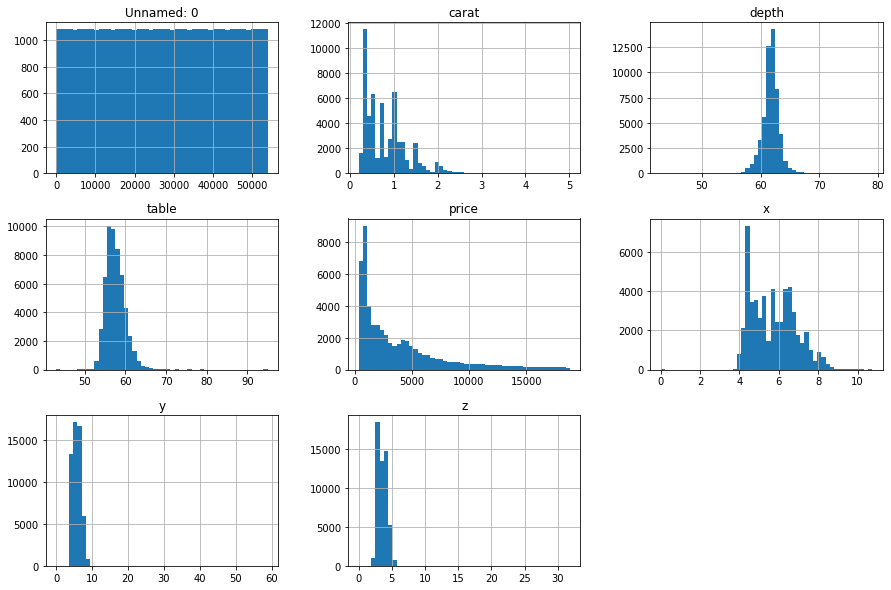

In [197]:
#plots to better visualize the data 
diamonds.hist(bins=50,figsize=(15,10))
plt.show()

#Cleaning the data

In [198]:
#dropping the unneeded column, the index column 
diamonds = diamonds.drop("Unnamed: 0",axis=1)

In [199]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [200]:
#dropping any values that contain "0" dimentions 
diamonds = diamonds.drop(diamonds[(diamonds["x"]==0)| (diamonds["y"]==0)|(diamonds["z"]==0)].index)

In [201]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


#Text and Categorical Attributes 

In [202]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [203]:
#replacing the text values into numbers usning the replace function 
diamonds.replace({"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}, inplace=True)
diamonds.replace({"J": 1, "I": 2, "H": 3, "G": 4, "F": 5, "E": 6, "D": 7}, inplace=True)
diamonds.replace({"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1": 7, "IF": 8}, inplace=True)

In [204]:
#using 1hot encoding
from sklearn.preprocessing import OneHotEncoder
def oneHot(a):
    cat_encoder=OneHotEncoder()
    encoded_cat=cat_encoder.fit_transform(diamonds[[a]])
    diamonds[a]=encoded_cat.toarray()

oneHot("clarity")
oneHot("color")
oneHot("cut")

In [205]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0.0,0.0,0.0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,0.0,0.0,0.0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,0.0,0.0,0.0,56.9,65.0,327,4.05,4.07,2.31
3,0.29,0.0,0.0,0.0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,0.0,1.0,0.0,63.3,58.0,335,4.34,4.35,2.75


In [206]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  float64
 2   color    53920 non-null  float64
 3   clarity  53920 non-null  float64
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 4.5 MB


In [207]:
#adding an extra attribute : the volume attribute 
diamonds["volume"] = diamonds["x"]*diamonds["y"]*diamonds["z"]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  float64
 2   color    53920 non-null  float64
 3   clarity  53920 non-null  float64
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
 10  volume   53920 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 4.9 MB


In [208]:
diamonds=diamonds.drop(['x', 'y', 'z'], axis=1)

In [219]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  float64
 2   color    53920 non-null  float64
 3   clarity  53920 non-null  float64
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   volume   53920 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 3.7 MB


#Splitting the Data

In [209]:
# splitting the data into test and train sets 
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(diamonds,test_size=0.1)

In [210]:
#dropping the price function from the train set 
train_set_x=train_set.drop(["price"],axis=1)
train_set_y=train_set["price"]
test_set_x = test_set.drop(["price"],axis=1)
test_set_y = test_set["price"]

#Training the Model

In [211]:
# Tree regression 
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_set_x, train_set_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [212]:
# finding the RMSE value 
from sklearn.metrics import mean_squared_error
diamonds_predictions=tree_reg.predict(train_set_x)
tree_mse= mean_squared_error(train_set_y,diamonds_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

166.53886607015792

In [213]:
# Checking the validation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, train_set_x, train_set_y,
scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("Mean ", rmse_scores.mean())

Mean  1536.3622886669746


In [214]:
#Linear Regression 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_set_x, train_set_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [215]:
#RMSE for linear 
scores = cross_val_score(lin_reg, train_set_x, train_set_y,scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("Mean ", rmse_scores.mean())

Mean  1525.5315152171975


In [216]:
# Random Forest Regression 
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train_set_x, train_set_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [217]:
#Valedation 
scores = cross_val_score(forest_reg, train_set_x, train_set_y,
scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("Mean (with Cross_val)", rmse_scores.mean())

Mean (with Cross_val) 1187.7812732544546


In [218]:
# checking the accuracy 

diamonds_predictions = forest_reg.predict(test_set_x)
forest_mse = mean_squared_error(test_set_y, diamonds_predictions)
forest_rmse = np.sqrt(forest_mse)
print("RMSE",forest_rmse)
test_accuracy = forest_reg.score(test_set_x, test_set_y)*100
print("Accuracy:", test_accuracy)

RMSE 1190.3664567887793
Accuracy: 91.52314083548525
